In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## alpha 

In [11]:
dn,tn = 9,10

alpha_bip_rank,alpha_bipcs_rank,alpha_mp_rank,alpha_mpcs_rank = np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn))

for drop_num in range(4,13):
    for test_size in range(1,11):
        ##Load corresponding pickle files
        if test_size == 10:
            file_path = '../result/drops-{0}__test_size-0.1__batch_size-64'.format(drop_num)
        else:
            file_path = '../result/drops-{0}__test_size-0.0{1}__batch_size-64'.format(drop_num,test_size)
        file = pickle.load(open(file_path,'rb'))
        
        truth = np.asanyarray(file['truth'])
        bi_preds = np.asanyarray(file['bi_preds'])
        bi_preds_cover_self = np.asanyarray(file['bi_preds_cover_self'])
        multi_preds = np.asanyarray(file['multi_preds'])
        multi_preds_cover_self = np.asanyarray(file['multi_preds_cover_self'])
        
        bp_avg,bpcs_avg,mp_avg,mpcs_avg = [],[],[],[]
        
        for i in range(20):
            bp_max = truth[i][np.argmax(bi_preds[i])]
            bpcs_max = truth[i][np.argmax(bi_preds_cover_self[i])]
            mp_max = truth[i][np.argmax(multi_preds[i])]
            mpcs_max = truth[i][np.argmax(multi_preds_cover_self[i])]
            
            sorted_truth = sorted(truth[i])
            
            bp_avg.append(np.where(sorted_truth == bp_max)[0][0])
            bpcs_avg.append(np.where(sorted_truth == bpcs_max)[0][0])
            mp_avg.append(np.where(sorted_truth == mp_max)[0][0])
            mpcs_avg.append(np.where(sorted_truth == mpcs_max)[0][0])
        
        alpha_bip_rank[drop_num-4][test_size-1] = np.mean(bp_avg) / len(truth[0])
        alpha_bipcs_rank[drop_num-4][test_size-1] = np.mean(bpcs_avg) / len(truth[0])
        alpha_mp_rank[drop_num-4][test_size-1] = np.mean(mp_avg) / len(truth[0])
        alpha_mpcs_rank[drop_num-4][test_size-1] = np.mean(mpcs_avg) / len(truth[0])
        

**Visualization**

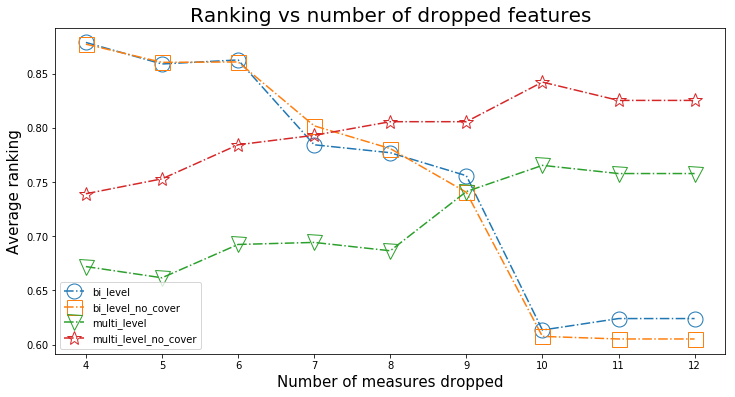

In [12]:
fig,ax = plt.subplots(figsize=(12,6))
drops = [i for i in range(4,13)]
bip_val = np.mean(alpha_bip_rank,axis=1)
bipcs_val = np.mean(alpha_bipcs_rank,axis=1)
mp_val = np.mean(alpha_mp_rank,axis=1)
mpcs_val = np.mean(alpha_mpcs_rank,axis=1)
plt.plot(drops,bip_val,label='bi_level',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
plt.plot(drops,bipcs_val, label='bi_level_no_cover',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
plt.plot(drops,mp_val,label='multi_level',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
plt.plot(drops,mpcs_val,label='multi_level_no_cover',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
plt.legend()
plt.xlabel('Number of measures dropped',fontsize=15)
plt.ylabel('Average ranking',fontsize=15)
plt.title('Ranking vs number of dropped features',fontsize=20);

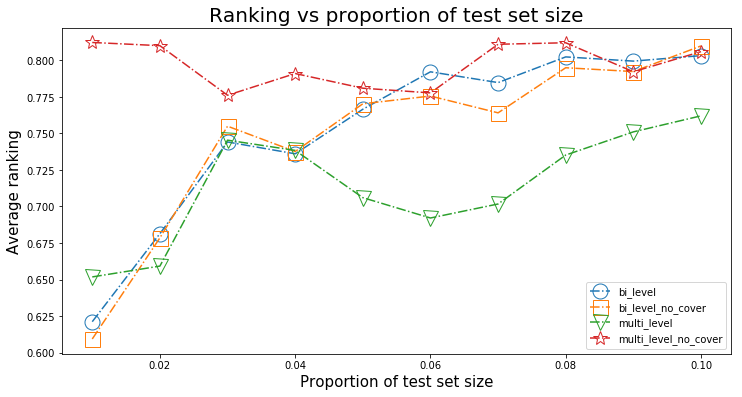

In [13]:
fig,ax = plt.subplots(figsize=(12,6))
drops = [i/100 for i in range(1,11)]
bip_val = np.mean(alpha_bip_rank,axis=0)
bipcs_val = np.mean(alpha_bipcs_rank,axis=0)
mp_val = np.mean(alpha_mp_rank,axis=0)
mpcs_val = np.mean(alpha_mpcs_rank,axis=0)
plt.plot(drops,bip_val,label='bi_level',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
plt.plot(drops,bipcs_val, label='bi_level_no_cover',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
plt.plot(drops,mp_val,label='multi_level',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
plt.plot(drops,mpcs_val,label='multi_level_no_cover',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
plt.legend()
plt.xlabel('Proportion of test set size',fontsize=15)
plt.ylabel('Average ranking',fontsize=15)
plt.title('Ranking vs proportion of test set size',fontsize=20);

## Quantile

In [14]:
file_path = '../result_quantile/quantile__drops-5__test_size-0.01__batch_size-64'
file = pickle.load(open(file_path,'rb'))

In [15]:
file.keys()

dict_keys(['time', 'truth', 'bi_preds', 'bi_preds_lin', 'bi_preds_cover_self', 'multi_preds', 'multi_preds_lin', 'multi_preds_cover_self', 'bi_preds_theta', 'bi_preds_lin_theta', 'bi_preds_cover_self_theta', 'multi_preds_theta', 'multi_preds_lin_theta', 'multi_preds_cover_self_theta'])

In [16]:
alpha = np.asanyarray(file['bi_preds'])
truth = np.asanyarray(file['truth'])
truth.shape

(20, 100)

In [17]:
dn,tn = 9,10

quantile_bip_rank,quantile_bipcs_rank,quantile_bip_lin_rank = np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn))
quantile_mp_rank,quantile_mpcs_rank,quantile_mp_lin_rank = np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn)),np.ndarray(shape=(dn,tn))

for drop_num in range(4,13):
    for test_size in range(1,11):
        ##Load corresponding pickle files
        if test_size == 10:
            file_path = '../result_quantile/quantile__drops-{0}__test_size-0.1__batch_size-64'.format(drop_num)
        else:
            file_path = '../result_quantile/quantile__drops-{0}__test_size-0.0{1}__batch_size-64'.format(drop_num,test_size)
        file = pickle.load(open(file_path,'rb'))
        
        truth = np.asanyarray(file['truth'])
        bi_preds = np.asanyarray(file['bi_preds'])
        bi_preds_cover_self = np.asanyarray(file['bi_preds_cover_self'])
        #bi_preds_lin = np.asanyarray(file['bi_preds_lin'])
        multi_preds = np.asanyarray(file['multi_preds'])
        multi_preds_cover_self = np.asanyarray(file['multi_preds_cover_self'])
        #multi_preds_lin = np.asanyarray(file['multi_preds_lin'])
        
        bp_avg,bpcs_avg,bp_lin_avg,mp_avg,mpcs_avg,mp_lin_avg = [],[],[],[],[],[]
        
        for i in range(20):
            bp_max = truth[i][np.argmax(bi_preds[i])]
            bpcs_max = truth[i][np.argmax(bi_preds_cover_self[i])]
            #bp_lin_max = truth[i][np.argmax(bi_preds_lin[i])]
            mp_max = truth[i][np.argmax(multi_preds[i])]
            mpcs_max = truth[i][np.argmax(multi_preds_cover_self[i])]
            #mp_lin_max = truth[i][np.argmax(multi_preds_lin[i])]
            
            sorted_truth = sorted(truth[i])
            
            bp_avg.append(np.where(sorted_truth == bp_max)[0][0])
            bpcs_avg.append(np.where(sorted_truth == bpcs_max)[0][0])
            #bp_lin_avg.append(np.where(sorted_truth == bp_lin_max)[0][0])
            mp_avg.append(np.where(sorted_truth == mp_max)[0][0])
            mpcs_avg.append(np.where(sorted_truth == mpcs_max)[0][0])
            #mp_lin_avg.append(np.where(sorted_truth == mp_lin_max)[0][0])
        
        quantile_bip_rank[drop_num-4][test_size-1] = np.mean(bp_avg) / len(truth[0])
        quantile_bipcs_rank[drop_num-4][test_size-1] = np.mean(bpcs_avg) / len(truth[0])
        #quantile_bip_lin_rank[drop_num-4][test_size-1] = np.mean(bp_lin_avg) / len(truth[0])
        quantile_mp_rank[drop_num-4][test_size-1] = np.mean(mp_avg) / len(truth[0])
        quantile_mpcs_rank[drop_num-4][test_size-1] = np.mean(mpcs_avg) / len(truth[0])
        #quantile_mp_lin_rank[drop_num-4][test_size-1] = np.mean(mp_lin_avg) / len(truth[0])
        

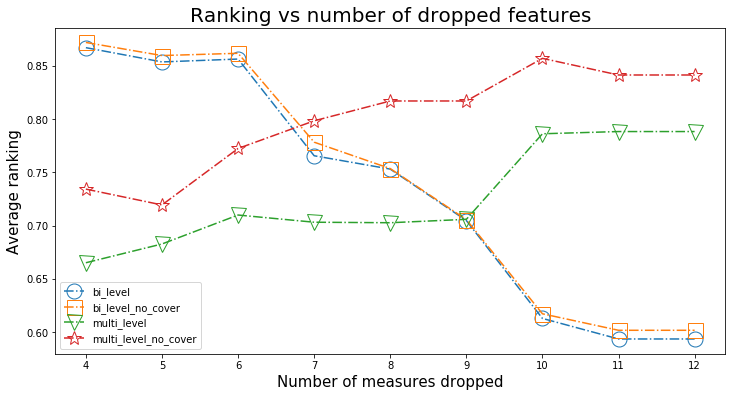

In [19]:
fig,ax = plt.subplots(figsize=(12,6))
drops = [i for i in range(4,13)]
bip_val = np.mean(quantile_bip_rank,axis=1)
bipcs_val = np.mean(quantile_bipcs_rank,axis=1)
#bip_lin_val = np.mean(quantile_bip_lin_rank,axis=1)
mp_val = np.mean(quantile_mp_rank,axis=1)
mpcs_val = np.mean(quantile_mpcs_rank,axis=1)
#mp_lin_val = np.mean(quantile_mp_lin_rank,axis=1)

plt.plot(drops,bip_val,label='bi_level',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
plt.plot(drops,bipcs_val, label='bi_level_no_cover',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
#plt.plot(drops,bip_lin_val, label='bi_level_linear',linestyle='-.',marker='+',markersize=15,markerfacecolor="None")
plt.plot(drops,mp_val,label='multi_level',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
plt.plot(drops,mpcs_val,label='multi_level_no_cover',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
#plt.plot(drops,mp_lin_val,label='multi_level_linear',linestyle='-.',marker="D",markersize=15,markerfacecolor="None")
plt.legend()
plt.xlabel('Number of measures dropped',fontsize=15)
plt.ylabel('Average ranking',fontsize=15)
plt.title('Ranking vs number of dropped features',fontsize=20);

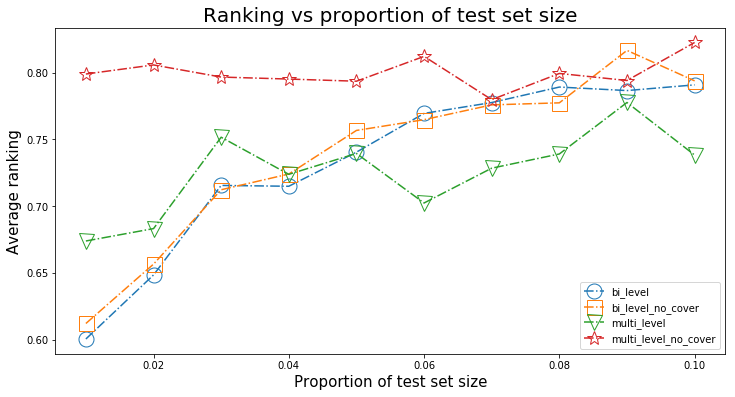

In [20]:
fig,ax = plt.subplots(figsize=(12,6))
drops = [i/100 for i in range(1,11)]
bip_val = np.mean(quantile_bip_rank,axis=0)
bipcs_val = np.mean(quantile_bipcs_rank,axis=0)
#bip_lin_val = np.mean(bip_lin_rank,axis=0)
mp_val = np.mean(quantile_mp_rank,axis=0)
mpcs_val = np.mean(quantile_mpcs_rank,axis=0)
#mp_lin_val = np.mean(mp_lin_rank,axis=0)

plt.plot(drops,bip_val,label='bi_level',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
plt.plot(drops,bipcs_val, label='bi_level_no_cover',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
#plt.plot(drops,bip_lin_val, label='bi_level_linear',linestyle='-.',marker='+',markersize=15,markerfacecolor="None")
plt.plot(drops,mp_val,label='multi_level',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
plt.plot(drops,mpcs_val,label='multi_level_no_cover',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
#plt.plot(drops,mp_lin_val,label='multi_level_linear',linestyle='-.',marker="D",markersize=15,markerfacecolor="None")
plt.legend()
plt.xlabel('Proportion of test set size',fontsize=15)
plt.ylabel('Average ranking',fontsize=15)
plt.title('Ranking vs proportion of test set size',fontsize=20);

## Linear regression

In [21]:
with open('../Data/states_bpleq65.p','rb') as f:
    states = pickle.load(f)

In [22]:
patient_ids = list(states.keys())

In [23]:
pid = patient_ids[0]
df_clean = states[pid].loc[:,~states[pid].columns.isin(['Times','bicarbonate_ind', 'bun_ind','creatinine_ind',
                                                        'fio2_ind','glucose_ind','hct_ind','hr_ind','lactate_ind',
                                                        'magnesium_ind','meanbp_ind','platelets_ind','potassium_ind',
                                                        'sodium_ind','spo2_ind','spontaneousrr_ind','temp_ind',
                                                        'urine_ind','wbc_ind'])]

df_clean.insert(0,'ICU_ID',pid)
df_x_train = df_clean.loc[:,~df_clean.columns.isin(['sofa','oasis','saps'])]
df_y_train = df_clean[['sofa','oasis','saps']]

x_train = df_x_train.iloc[0]
y_train = df_y_train.iloc[0]


for pid in patient_ids[1:]:
    df_clean = states[pid].loc[:,~states[pid].columns.isin(['Times','bicarbonate_ind', 'bun_ind','creatinine_ind',
                                                            'fio2_ind','glucose_ind','hct_ind','hr_ind','lactate_ind',
                                                            'magnesium_ind','meanbp_ind','platelets_ind','potassium_ind',
                                                            'sodium_ind','spo2_ind','spontaneousrr_ind','temp_ind',
                                                            'urine_ind','wbc_ind'])]
    
    df_clean.insert(0,'ICU_ID',pid)
    df_x_train = df_clean.loc[:,~df_clean.columns.isin(['sofa','oasis','saps'])]
    df_y_train = df_clean[['sofa','oasis','saps']]
    
    x_train = pd.concat([x_train,df_x_train.iloc[0]],axis=1)
    y_train = pd.concat([y_train,df_y_train.iloc[0]],axis=1)

In [24]:
x_train = x_train.T.reset_index(drop=True)
y_train = y_train.T.reset_index(drop=True)

x_train = x_train.drop(['ICU_ID'],axis=1)

In [25]:
measure_freq = {'bicarbonate': 2.981861,'bun': 1.499739,'creatinine': 1.505387,\
                'fio2': 9.647378,'glucose': 6.117458,'hct': 1.975867,'lactate': 1.330443,\
                'magnesium': 1.955151,'platelets': 1.459454,'potassium': 2.182242,\
                'sodium': 1.744012,'wbc': 1.395242,'urine':19.13}
harder_measure = sorted(measure_freq, key=measure_freq.get)

In [26]:
harder_measure

['lactate',
 'wbc',
 'platelets',
 'bun',
 'creatinine',
 'sodium',
 'magnesium',
 'hct',
 'potassium',
 'bicarbonate',
 'glucose',
 'fio2',
 'urine']

In [27]:
#harder_measure = ['sodium','potassium','fio2','bicarbonate','lactate','wbc','platelets','bun','creatinine','magnesium','hct','glucose']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [34]:
dn,tn = 10,10
repeat = 20
lin_rank = np.ndarray(shape=(dn,tn))
lin_weights = {}

In [35]:
for j in range(4,len(harder_measure)+1):
    measure = harder_measure[:j]
    for k in range(1,11):
        ts = k/100
        lin_weights[str(j)+'_'+str(ts)] = []
        lin_avg = []
        for i in range(repeat):
            np.random.seed(i)
            index = np.random.choice(len(x_train), size=10000, replace=False)
            x, y = x_train.iloc[index], y_train.iloc[index]
            x[measure] = 0
            lin_x = x.values
            lin_y = y['saps'].values

            x_train_lin,x_test_lin,y_train_lin,y_test_lin = train_test_split(lin_x,lin_y,test_size=ts,random_state=i)
            
            reg = LinearRegression().fit(x_train_lin,y_train_lin)
            lin_weights[str(j)+'_'+str(ts)].append(reg.coef_)
            #print(str(j)+'_'+str(ts),reg.intercept_)
            
            y_preds = reg.predict(x_test_lin)
            
            lin_max = y_test_lin[np.argmax(y_preds)]
            
            sorted_truth = sorted(y_test_lin)
            
            lin_avg.append(np.where(sorted_truth==lin_max)[0][0])
        
        lin_rank[j-4,k-1] = np.mean(lin_avg) / len(y_test_lin)

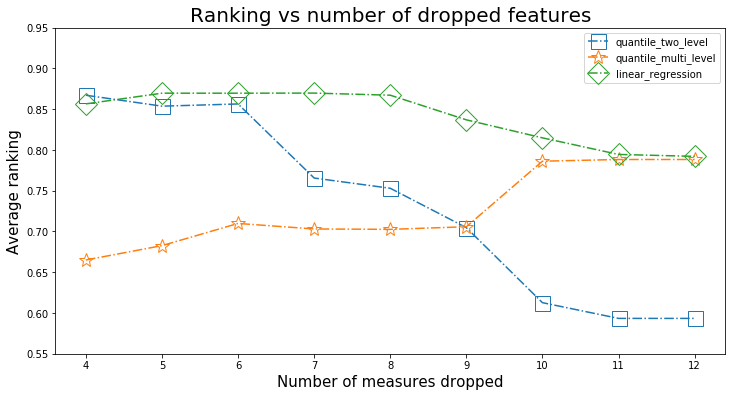

In [36]:
fig,ax = plt.subplots(figsize=(12,6))
drops = [i for i in range(4,13)]
alpha_bip_val = np.mean(alpha_bip_rank,axis=1)
quantile_bip_val = np.mean(quantile_bip_rank,axis=1)
alpha_mp_val = np.mean(alpha_mp_rank,axis=1)
quantile_mp_val = np.mean(quantile_mp_rank,axis=1)
lin_val = np.mean(lin_rank[:-1,:],axis=1)

#plt.plot(drops,alpha_bip_val,label='alpha_two_level',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
plt.plot(drops,quantile_bip_val, label='quantile_two_level',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
#plt.plot(drops,alpha_mp_val,label='alpha_multi_level',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
plt.plot(drops,quantile_mp_val,label='quantile_multi_level',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
plt.plot(drops,lin_val,label='linear_regression',linestyle='-.',marker="D",markersize=15,markerfacecolor="None")

plt.legend()
plt.ylim(0.55,0.95)
plt.xlabel('Number of measures dropped',fontsize=15)
plt.ylabel('Average ranking',fontsize=15)
plt.title('Ranking vs number of dropped features',fontsize=20);

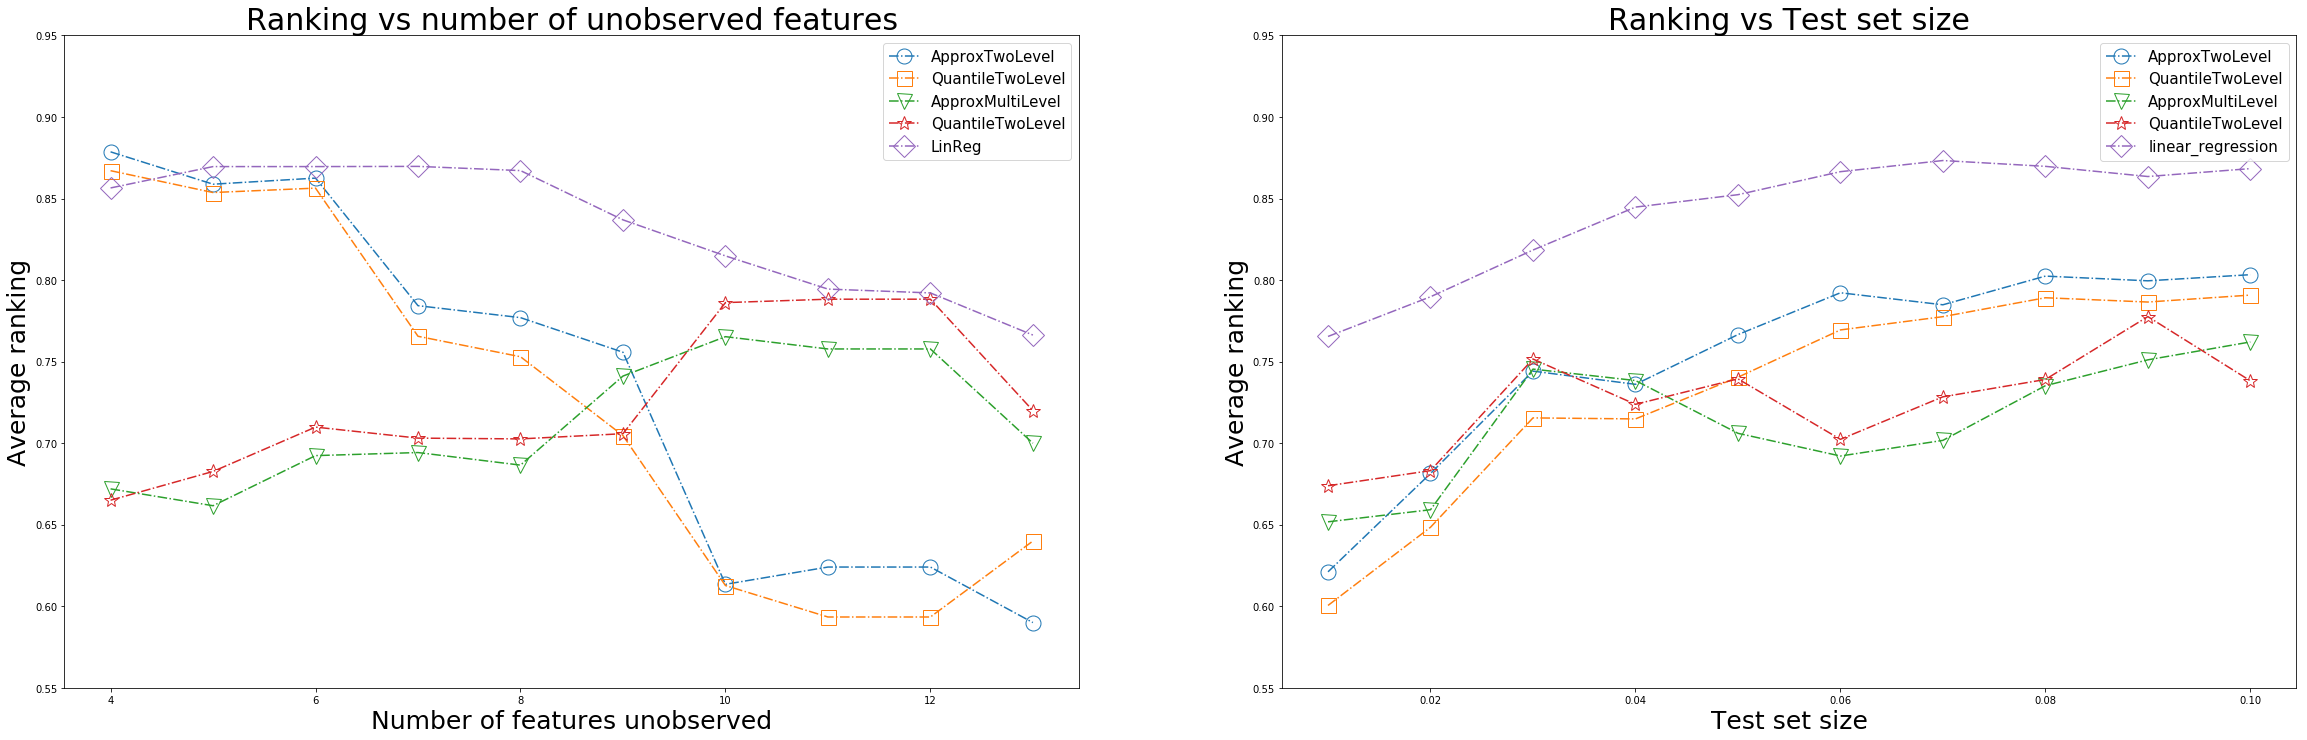

In [37]:
fig,ax = plt.subplots(1,2,figsize=(40,12))

d_drops = [i for i in range(4,14)]
d_alpha_bip_val = np.append(np.mean(alpha_bip_rank,axis=1),0.59)
d_quantile_bip_val = np.append(np.mean(quantile_bip_rank,axis=1),0.64)
d_alpha_mp_val = np.append(np.mean(alpha_mp_rank,axis=1),0.7)
d_quantile_mp_val = np.append(np.mean(quantile_mp_rank,axis=1),0.72)
d_lin_val = np.mean(lin_rank,axis=1)

t_drops = [i/100 for i in range(1,11)]
t_alpha_bip_val = np.mean(alpha_bip_rank,axis=0)
t_quantile_bip_val = np.mean(quantile_bip_rank,axis=0)
t_alpha_mp_val = np.mean(alpha_mp_rank,axis=0)
t_quantile_mp_val = np.mean(quantile_mp_rank,axis=0)
t_lin_val = np.mean(lin_rank[:-1,:],axis=0)


ax[0].plot(d_drops,d_alpha_bip_val,label='ApproxTwoLevel',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
ax[0].plot(d_drops,d_quantile_bip_val, label='QuantileTwoLevel',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
ax[0].plot(d_drops,d_alpha_mp_val,label='ApproxMultiLevel',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
ax[0].plot(d_drops,d_quantile_mp_val,label='QuantileTwoLevel',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
ax[0].plot(d_drops,d_lin_val,label='LinReg',linestyle='-.',marker="D",markersize=15,markerfacecolor="None")
ax[0].set_xlabel('Number of features unobserved',fontsize=25)
ax[0].set_ylabel('Average ranking',fontsize=25)
ax[0].set_title('Ranking vs number of unobserved features',fontsize=30)
ax[0].set_ylim(0.55,0.95)
ax[0].legend(fontsize=15)

ax[1].plot(t_drops,t_alpha_bip_val,label='ApproxTwoLevel',linestyle='-.',marker="o",markersize=15,markerfacecolor="None")
ax[1].plot(t_drops,t_quantile_bip_val, label='QuantileTwoLevel',linestyle='-.',marker="s",markersize=15,markerfacecolor="None")
ax[1].plot(t_drops,t_alpha_mp_val,label='ApproxMultiLevel',linestyle='-.',marker="v",markersize=15,markerfacecolor="None")
ax[1].plot(t_drops,t_quantile_mp_val,label='QuantileTwoLevel',linestyle='-.',marker="*",markersize=15,markerfacecolor="None")
ax[1].plot(t_drops,t_lin_val,label='linear_regression',linestyle='-.',marker="D",markersize=15,markerfacecolor="None")  
ax[1].set_xlabel('Test set size',fontsize=25)
ax[1].set_ylabel('Average ranking',fontsize=25)
ax[1].set_title('Ranking vs Test set size',fontsize=30)
ax[1].set_ylim(0.55,0.95)
ax[1].legend(fontsize=15)

plt.ylim(0.55,0.95)
plt.savefig('../visualized_result.png',transparent=True)

In [195]:
existing = [5,6,7,8,9,10]
bp_13_rank = np.zeros(len(existing))
mp_13_rank = np.zeros(len(existing))

for k,test_size in enumerate(existing):
    print(test_size)
    if test_size == 10:
        file_path = '../result_intercept/quantile__drops-13__test_size-0.1__batch_size-64'
    else:
        file_path = '../result_intercept/quantile__drops-13__test_size-0.0{0}__batch_size-64'.format(test_size)
    file = pickle.load(open(file_path,'rb'))

    truth = np.asanyarray(file['truth'])
    bi_preds = np.asanyarray(file['bi_preds'])
    bi_preds_cover_self = np.asanyarray(file['bi_preds_cover_self'])
    multi_preds = np.asanyarray(file['multi_preds'])
    multi_preds_cover_self = np.asanyarray(file['multi_preds_cover_self'])

    bp_avg,bpcs_avg,bp_lin_avg,mp_avg,mpcs_avg,mp_lin_avg = [],[],[],[],[],[]

    for i in range(20):
        bp_max = truth[i][np.argmax(bi_preds[i])]
        bpcs_max = truth[i][np.argmax(bi_preds_cover_self[i])]
        mp_max = truth[i][np.argmax(multi_preds[i])]
        mpcs_max = truth[i][np.argmax(multi_preds_cover_self[i])]

        sorted_truth = sorted(truth[i])

        bp_avg.append(np.where(sorted_truth == bp_max)[0][0])
        bpcs_avg.append(np.where(sorted_truth == bpcs_max)[0][0])
        mp_avg.append(np.where(sorted_truth == mp_max)[0][0])
        mpcs_avg.append(np.where(sorted_truth == mpcs_max)[0][0])

    bp_13_rank[k] = np.mean(bp_avg) / len(truth[0])
    mp_13_rank[k] = np.mean(mp_avg) / len(truth[0])


5
6
7
8
9
10


In [209]:
bp_13_rank.mean()

0.6421973269007238

In [208]:
mp_13_rank.mean()

0.7208030776139905

## Plot approximated value vs true value